Carregamento das bibliotecas

In [1]:
import json

import nltk #pacote para trabalhar com processamento de linguagem natural 
from nltk.corpus import stopwords #funções que podem ser usadas para ler arquivos corpus em vários formatos
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
#um modelo usado para análise de sentimento de texto que é sensível tanto à polaridade (positivo/negativo) quanto à intensidade (força) da emoção

import spacy

from sentic import SenticPhrase

import numpy as np                          
import matplotlib.pyplot as plt                   
%matplotlib inline
from collections import Counter

import re #uma sequência de caracteres que forma um padrão de pesquisa
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Entidades

In [2]:
file = open("NintendoTweets.json","r")
tweets = file.readlines()
file.close()

textott = ""

i = 0
for t in tweets:
    if(t != "\n" and (t.__contains__("limit") == False)): #caso tenha uma quebra de linhas ou uma linha vazia (sem informações)
        if i == 4000:
            break
        tweet = json.loads(t)
        textott = textott + " " + (tweet["text"])
        i = i + 1
print()

for x in textott.lower():
    if x == "#":
        textott = textott.replace(x,"") #fazer um replace das hashtags

In [3]:
nlp = spacy.load("en_core_web_sm") #utilizando biblioteca spacy para entidades
doc = nlp(textott)

enti = []
for entity in doc.ents:  
    palavra = entity.text.strip() #palavras viram letras
    confere = False 
    for x in palavra:
        if (x.isspace()): #conferir se possui espaço (erro para alocar textos em array posteriormente)
            confere = True
    if (confere == False):
        enti.append(entity.text)

In [4]:
tweets_filtered = enti
tweets_tokens = nltk.Text(tweets_filtered) #vai fazer tokens das entidades
freqrp=nltk.FreqDist(tweets_tokens) #vai ver a frequencia de vezes que uma entidade é repetida
top10 = freqrp.most_common(10)

#criação de arrays para o nome das entidades e outra para a quantidade de vezes que ela aparece
nome_entidade = [] 
valor = []
for (x, y) in top10:
    nome_entidade.append(x)
    valor.append(y)

print(33*"=")
print("|\t TOP 10 ENTIDADES       |")
print(33*"=")

for x in range(10):
    print("    TOP" + str(x+1) + " => " + str(nome_entidade[x])  + " - " + str(valor[x]))


|	 TOP 10 ENTIDADES       |
    TOP1 => NintendoE3 - 1440
    TOP2 => NintendoDirect - 205
    TOP3 => NintendoSwitch - 127
    TOP4 => Switch - 99
    TOP5 => Nintendo - 90
    TOP6 => E3 - 71
    TOP7 => Machina - 52
    TOP8 => Xenoblade - 50
    TOP9 => 2 - 47
    TOP10 => nintendoe3 - 31


(1440, 205, 127, 99, 90, 71, 52, 50, 47, 31)


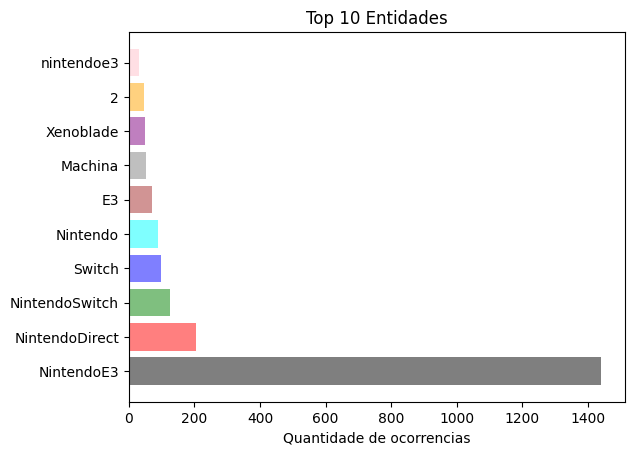

In [5]:
top10_tuplas = [(v, k) for k, v in top10]
x, y = zip(*top10_tuplas)
print(x)
y_pos = np.arange(len(x))

plt.barh(y, x, align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan', 'brown', 'grey', 'purple', 'orange', 'pink'])
plt.yticks(y_pos, y)
plt.xlabel('Quantidade de ocorrencias')
plt.title('Top 10 Entidades')
plt.show()

Verbos

In [6]:
verbosNintendo = [ token.text for token in doc if token.is_punct !=True and token.pos_ == 'VERB'] #vai ver o tipo do token das palavras, e vai atras dos VERB
ve = (Counter(verbosNintendo).most_common(10)) #contagem dos verbos mais comentados e separar os 10 maiores
verbos = [] #criação de arrays para nome e valor, assim como foi feito anteriormente
valores = []
for (x, y) in ve:
    verbos.append(x)
    valores.append(y)

print(30*"=")
print("|\t TOP 10 VERBOS       |")
print(30*"=")

for x in range(10):
    print("     TOP" + str(x+1) + " => " + str(verbos[x]) + " - " + str(valores[x]))

|	 TOP 10 VERBOS       |
     TOP1 => go - 158
     TOP2 => looks - 141
     TOP3 => see - 76
     TOP4 => Watch - 67
     TOP5 => starting - 65
     TOP6 => begun - 59
     TOP7 => Let - 53
     TOP8 => dig - 47
     TOP9 => Put - 44
     TOP10 => pick - 44


Analise de Sentimentos

In [8]:
file = open("NintendoTweets.json","r")
tweets = file.readlines()
file.close()

textott = ""

textEnt = 10 * [""] #criação de 10 arrays, um para cada entidade específica

i = 0
for t in tweets:
    if(t != "\n" and (t.__contains__("limit") == False)):
        tweet = json.loads(t)
        if i == 4000:
            break
        for x in range(10):
            if ((nome_entidade[x]) in tweet["text"]): #caso a entidade esteja num tweet
                textEnt[x] = textEnt[x] + " " + tweet["text"] + "\n"
        i = i + 1
print()

for x in textott.lower():
    if x == "#":
        textott = textott.replace(x,"")

In [9]:
# biblioteca NLTK (from nltk.sentiment.vader import SentimentIntensityAnalyzer)
# inicializamos o VADER para que possamos usá-lo em nosso script Python
sid = SentimentIntensityAnalyzer()
# Utilizar método polarity_scores no sid e passar dentro dele o textEnt produz um dicionário com pontuações negativas, neutras, positivas e compostas para o texto de entrada
scores0 = sid.polarity_scores(textEnt[0])
neg0 = scores0["neg"] #percorrendo o dicionário 
pos0 = scores0["pos"]
total0 = pos0 - neg0

scores1 = sid.polarity_scores(textEnt[1])
neg1 = scores1["neg"] 
pos1 = scores1["pos"]
total1 = pos1 - neg1

scores2 = sid.polarity_scores(textEnt[2])
neg2 = scores2["neg"]
pos2 = scores2["pos"]
total2 = pos2 - neg2

scores3 = sid.polarity_scores(textEnt[3])
neg3 = scores3["neg"]
pos3 = scores3["pos"]
total3 = pos3 - neg3

scores4 = sid.polarity_scores(textEnt[4])
neg4 = scores4["neg"]
pos4 = scores4["pos"]
total4 = pos4 - neg4

scores5 = sid.polarity_scores(textEnt[5])
neg5 = scores5["neg"] 
pos5 = scores5["pos"]
total5 = pos5 - neg5

scores6 = sid.polarity_scores(textEnt[6])
neg6 = scores6["neg"] 
pos6 = scores6["pos"]
total6 = pos6 - neg6

scores7 = sid.polarity_scores(textEnt[7])
neg7 = scores7["neg"] 
pos7= scores7["pos"]
total7 = pos7 - neg7

scores8 = sid.polarity_scores(textEnt[8])
neg8 = scores8["neg"] 
pos8 = scores8["pos"]
total8 = pos8 - neg8

scores9 = sid.polarity_scores(textEnt[9])
neg9 = scores9["neg"] 
pos9 = scores9["pos"]
total9 = pos9 - neg9

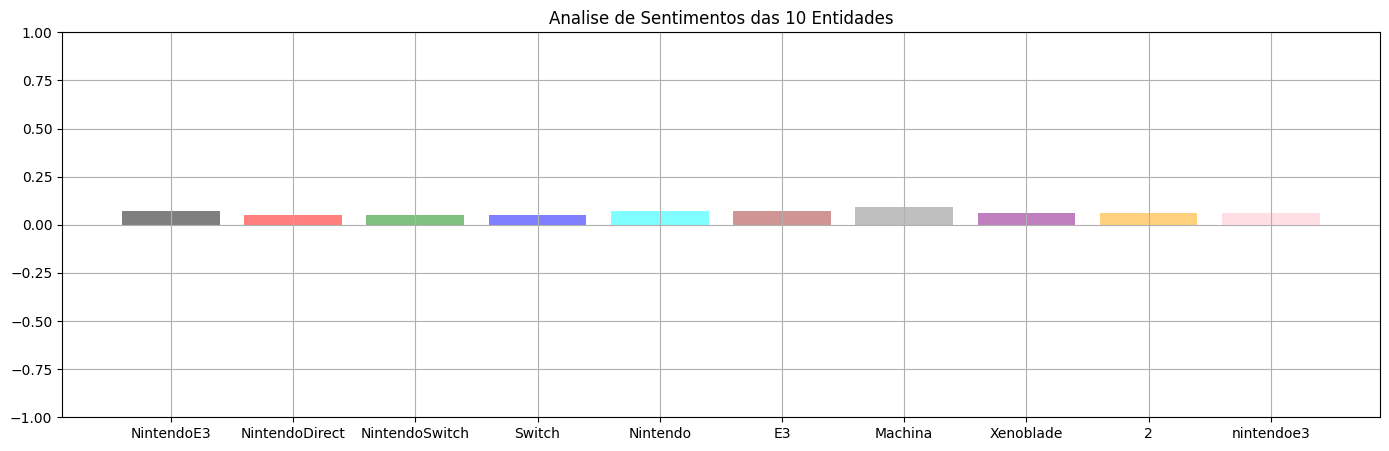

In [10]:
x = nome_entidade[0],nome_entidade[1],nome_entidade[2],nome_entidade[3],nome_entidade[4],nome_entidade[5],nome_entidade[6],nome_entidade[7],nome_entidade[8],nome_entidade[9]
y = total0,total1,total2,total3,total4,total5,total6,total7,total8,total9

plt.figure(figsize=(17,5))
plt.bar(x, y, align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan', 'brown', 'grey', 'purple', 'orange', 'pink'])
plt.ylim(-1,1)
plt.title('Analise de Sentimentos das 10 Entidades')
plt.grid(True)

Nuvem de Palavras

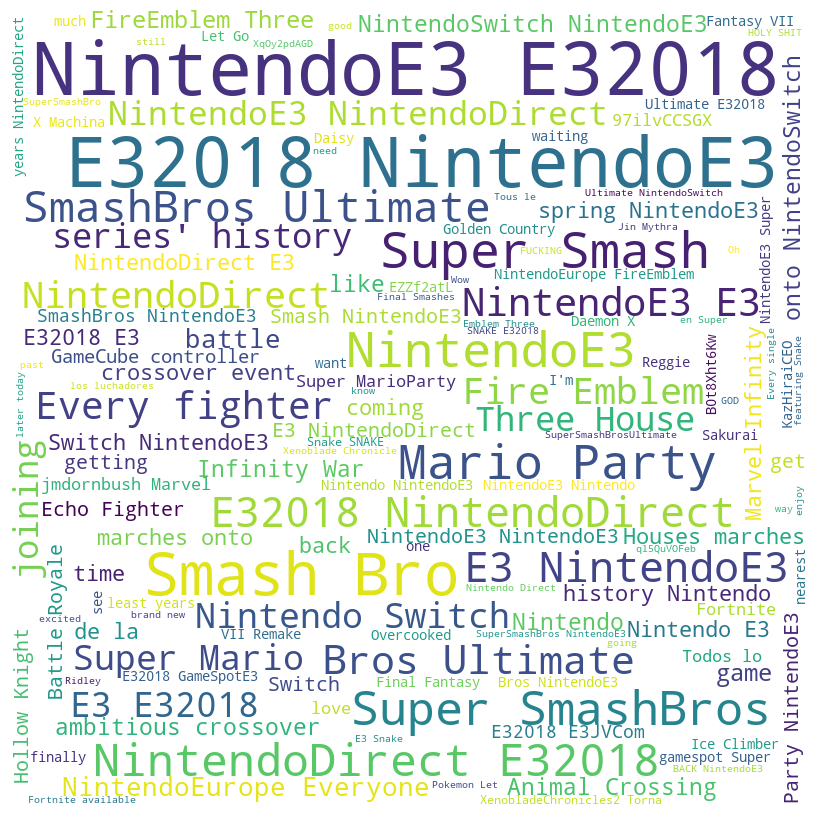

In [2]:
tweets = []
for line in open('NintendoTweets.json', 'r'):
    if len(line) > 1:
        tweets.append(json.loads(line))

texto_completo = ''

for t in tweets:
    if 'text' in t:
        tokens = t['text'].split(' ')
        for token in tokens:
            texto_completo += ' '+token

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.words('english')+['http','co','rt','https','//t','``','sm',"n't",'c','p','r','(',')','#','m','h',"'m","'","'s",'f','…','sh','n'],
                min_font_size = 10).generate(texto_completo)

# imagem WordCloud                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Análise de sentimento durante o tempo da conferência.

In [5]:
texto_minuto = {}

for t in tweets:
    if 'created_at' in t:
        t_date = t['created_at']
        result = re.search(r':(.*):', t_date)
        if result.group(1) not in texto_minuto:
            texto_minuto[result.group(1)] = ''
        tokens = t['text'].split(' ')
        for token in tokens:
            texto_minuto[result.group(1)] += ' '+token

In [ ]:
texto_minuto_sentimento = {}
for txm in texto_minuto.keys():
    sp = SenticPhrase(texto_minuto[txm])
    sp_sentiment=sp.get_sentiment()
    if 'positivo' in sp_sentiment:
        texto_minuto_sentimento[txm]=1
    if 'negativo' in sp_sentiment:
        texto_minuto_sentimento[txm]=-1
    if 'neutro' in sp_sentiment:
        texto_minuto_sentimento[txm]=0

print(texto_minuto_sentimento)

{'00': 1, '01': 0, '02': 1, '03': 1, '04': 1, '05': 1, '06': 0, '07': -1, '08': -1, '09': 0, '10': 0, '11': 1, '12': 0, '13': 1, '14': 1, '15': 1, '16': 1, '17': 0, '18': 1, '19': 1, '20': 1, '21': 0, '22': 0, '23': -1, '24': -1, '25': -1, '26': 0, '27': 0, '28': 0, '29': 0, '30': 1, '31': 0, '32': 0, '33': 1, '34': 1, '35': 1, '36': 1, '37': 1, '38': 1, '39': 1, '40': 1, '41': 1, '42': 0, '43': 1, '44': 1, '45': 1, '46': 1, '47': 1, '48': 1, '49': 1, '50': 1, '51': 1, '52': 1, '53': 0}


10 Palavras mais faladas durante o tempo da conferência

In [289]:
texto_minuto_top = {}
for txm in texto_minuto.keys():
    palavras_tweets = nltk.tokenize.word_tokenize(texto_minuto[txm])
    tweets_filtrados=[word for word in palavras_tweets if word not in stopwords.words('english')+['http','co','rt','https','//t','``','sm',"n't",'c','p','r','(',')','#','m','h',"'m","'","'s",'f','…','sh','n',':','!','@','RT','.',',','?']]
    tweets_tokens = nltk.Text(tweets_filtrados)
    freqrp=nltk.FreqDist(tweets_tokens)
    top_word = freqrp.most_common(10)
    texto_minuto_top[txm] = top_word

print(texto_minuto_top)

{'00': [('NintendoE3', 479), ('E32018', 263), ('NintendoDirect', 234), ('E3', 113), ('Nintendo', 80), ('go', 76), ('Here', 50), ('It', 42), ('IT', 38), ('’', 36)], '01': [('NintendoE3', 764), ('E32018', 414), ('NintendoDirect', 357), ('E3', 198), ('Nintendo', 123), ('I', 103), ('go', 56), ('game', 51), ('’', 48), ('This', 36)], '02': [('NintendoE3', 1003), ('E32018', 465), ('NintendoDirect', 385), ('E3', 226), ('Machina', 178), ('X', 169), ('Daemon', 168), ('I', 142), ('2019', 130), ('Nintendo', 123)], '03': [('NintendoE3', 820), ('E32018', 387), ('NintendoDirect', 307), ('Xenoblade', 166), ('E3', 163), ('2019', 138), ('Nintendo', 123), ('I', 120), ('Daemon', 113), ('X', 111)], '04': [('NintendoE3', 989), ('E32018', 494), ('NintendoDirect', 324), ('Xenoblade', 286), ('DLC', 218), ('2', 198), ('E3', 179), ('I', 130), ('REGGIE', 130), ('Reggie', 120)], '05': [('NintendoE3', 916), ('E32018', 492), ('NintendoDirect', 346), ('E3', 184), ('Xenoblade', 161), ('Reggie', 155), ('2', 143), ('DLC